# Exploratory Data Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import missingno as msno

In [6]:
df = pd.read_csv('RTA Dataset.csv')

**Display the dataset**

In [7]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


**Identify the summary of the dataset**

In [8]:
df.shape

(12316, 32)

The dataset has 12316 rows and 32 columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

The dataset has the following details: 
1. Memory usage: 3.0+ MB
2. Number of columns: 32
3. Number of rows: 12316
4. Number of columns in int64 dataype: 2
5. Number of columns in object datatype: 30
6. Number of columns with missing values: 16

**Identify missing values** <br>
The following columns contain missing values

In [10]:
df.columns[df.isnull().sum().sort_values() == 0]

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type'],
      dtype='object')

**Identify Duplicates**

In [11]:
df.duplicated().sum()

0

All rows have unique values

**Check the unique values of each columns**

In [12]:
for col in df:
    print("Unique Values for: "+col)
    print(df[col].unique())

Unique Values for: Time
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
Unique Values for: Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
Unique Values for: Age_band_of_driver
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Unique Values for: Sex_of_driver
['Male' 'Female' 'Unknown']
Unique Values for: Educational_level
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
Unique Values for: Vehicle_driver_relation
['Employee' 'Unknown' 'Owner' nan 'Other']
Unique Values for: Driving_experience
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
Unique Values for: Type_of_vehicle
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle'

**Display Statistical description of the dataset** <br>

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [14]:
df.describe(include="object").T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


**Display Numeric Variables**

In [15]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True

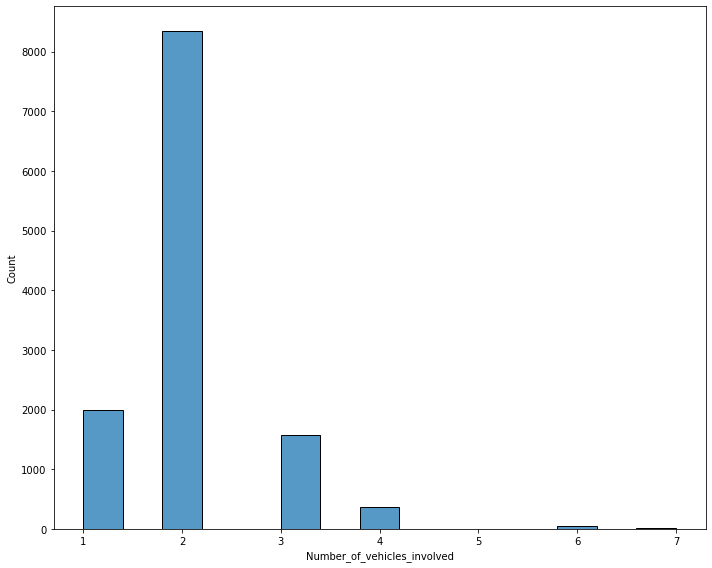

In [16]:
sns.histplot(df['Number_of_vehicles_involved'])
plt.show()

As shown in the figure above, two vehicles are most involved in every accident. There tendency where the most of the accidents happen are due to collision of two vehicles.

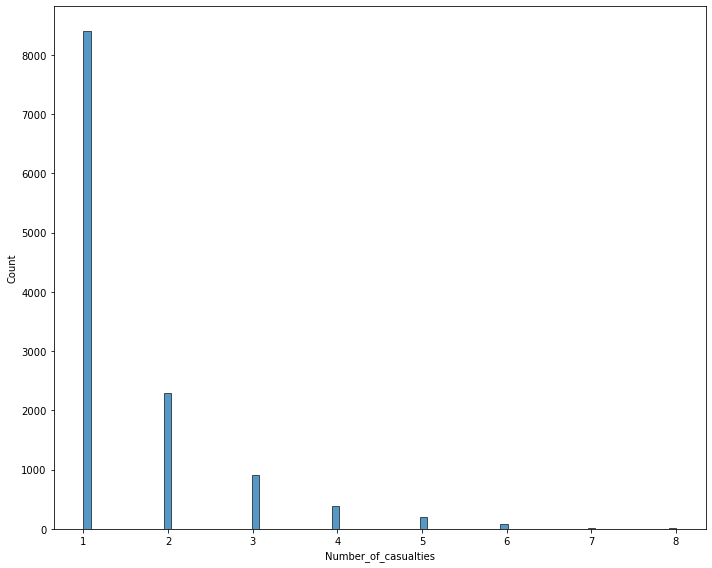

In [17]:
sns.histplot(df['Number_of_casualties'])
plt.show()

One casualty is most common number of person involved in every accident. In the next graph, we will see who are these people affected in an accident.

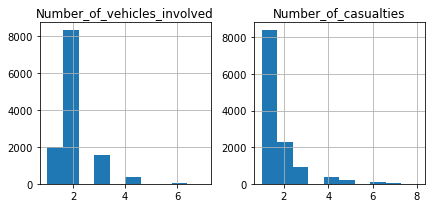

In [18]:
df.hist(layout=(1,6), figsize=(18,3))
plt.show()

**Display Categorical variables**

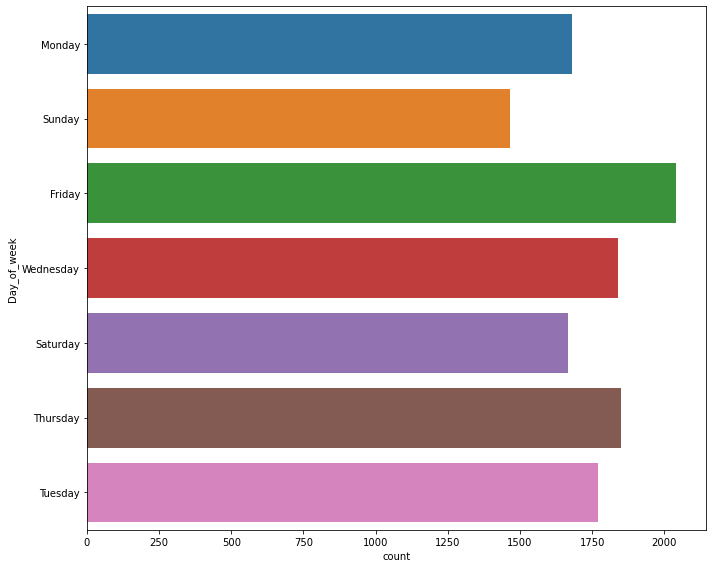

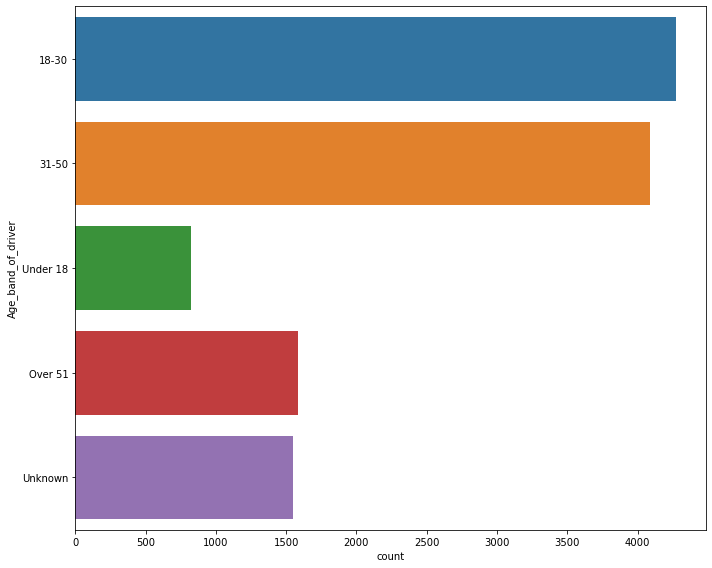

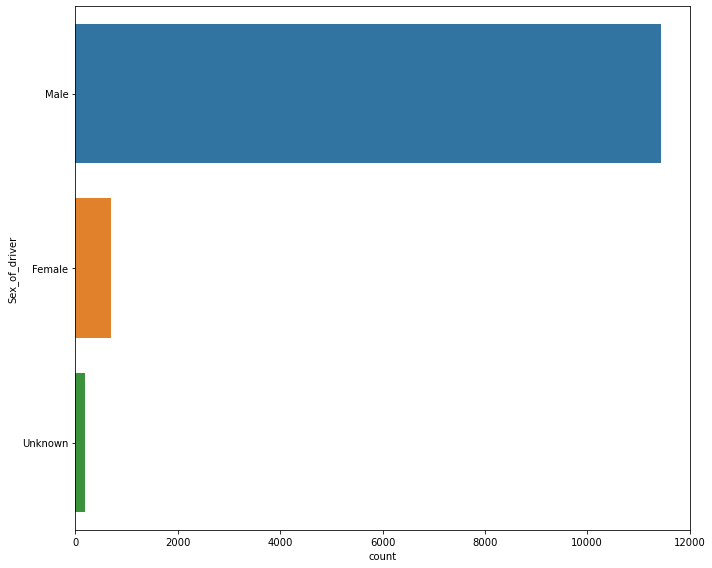

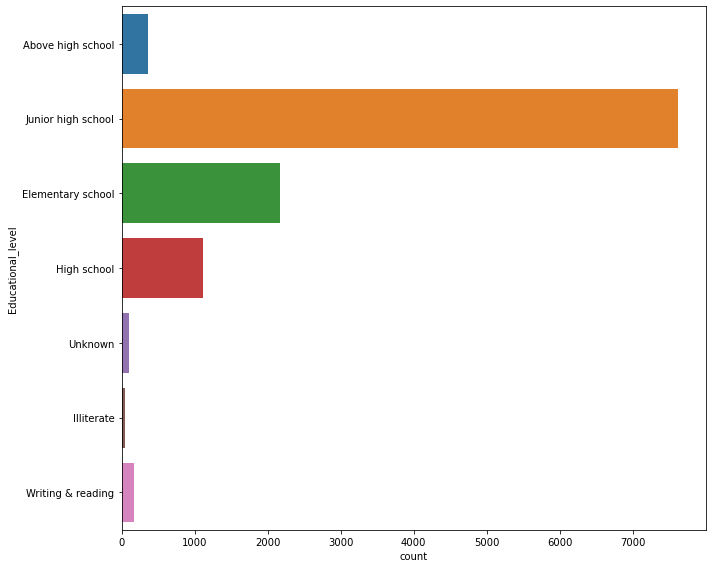

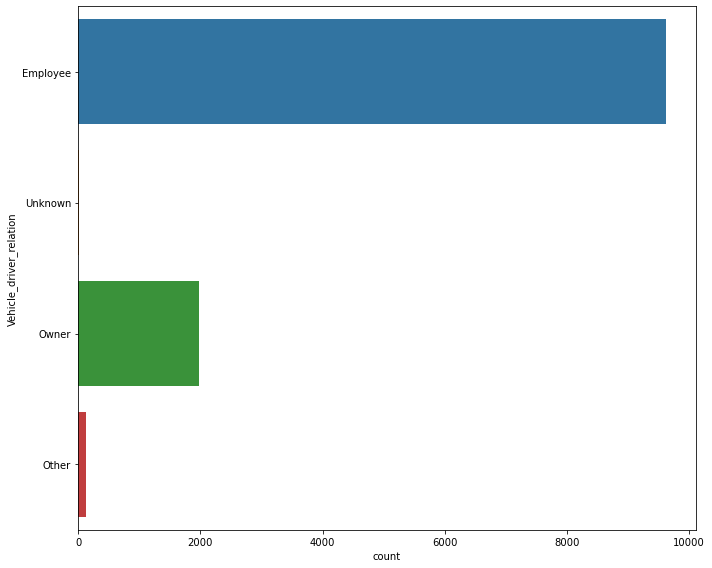

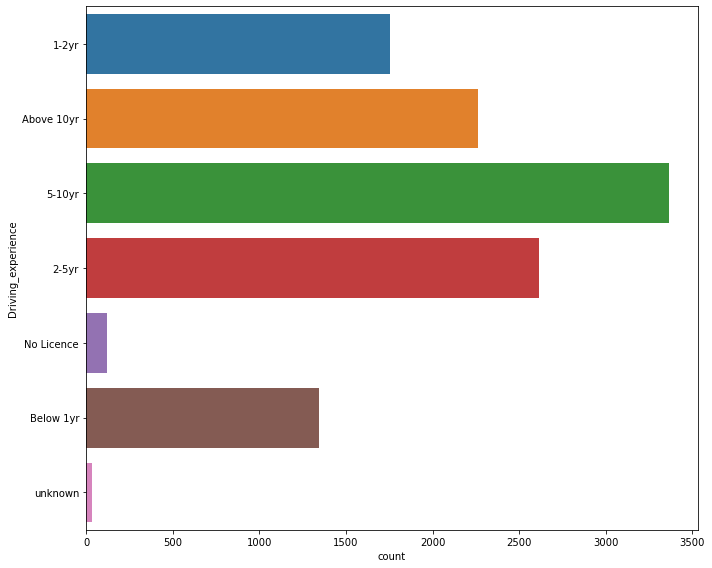

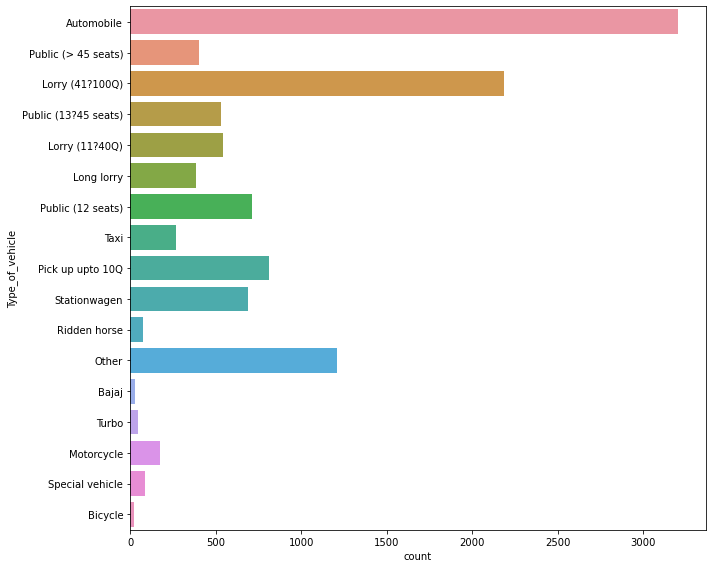

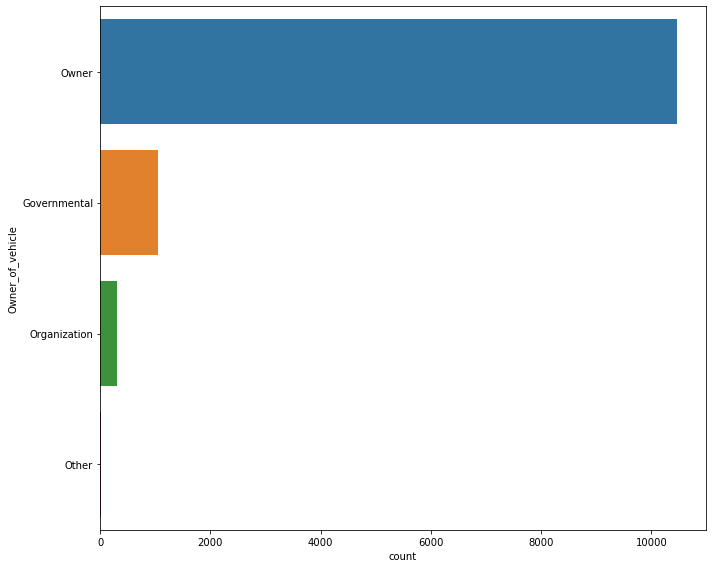

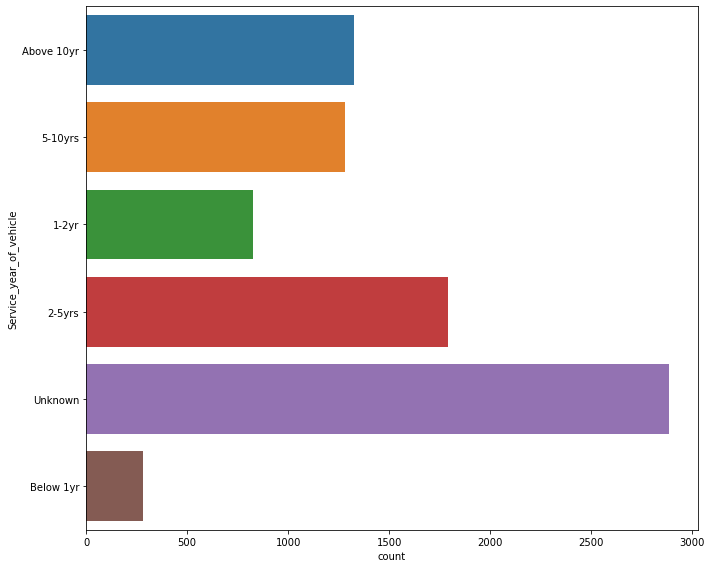

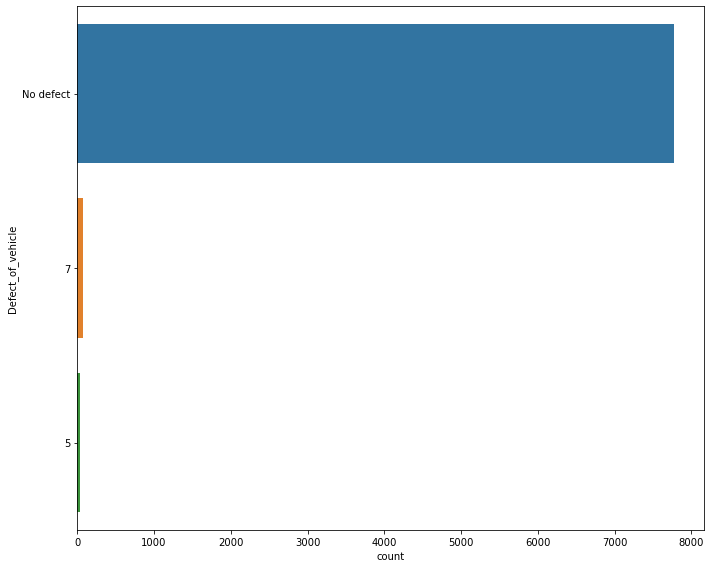

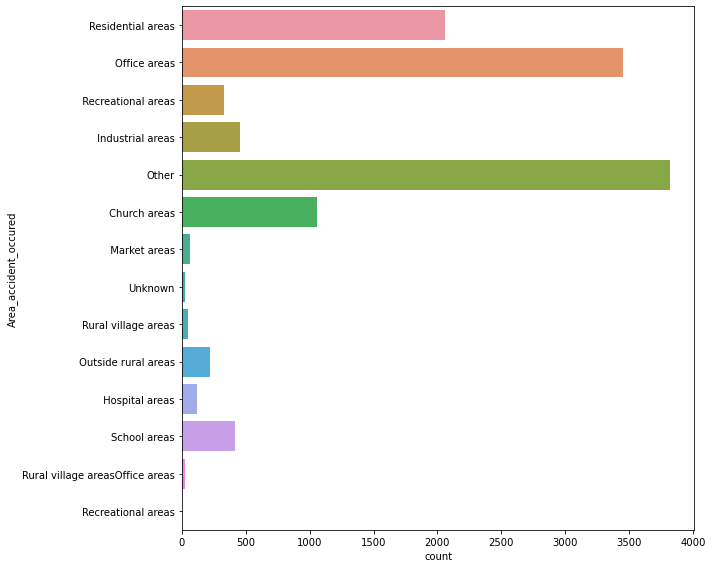

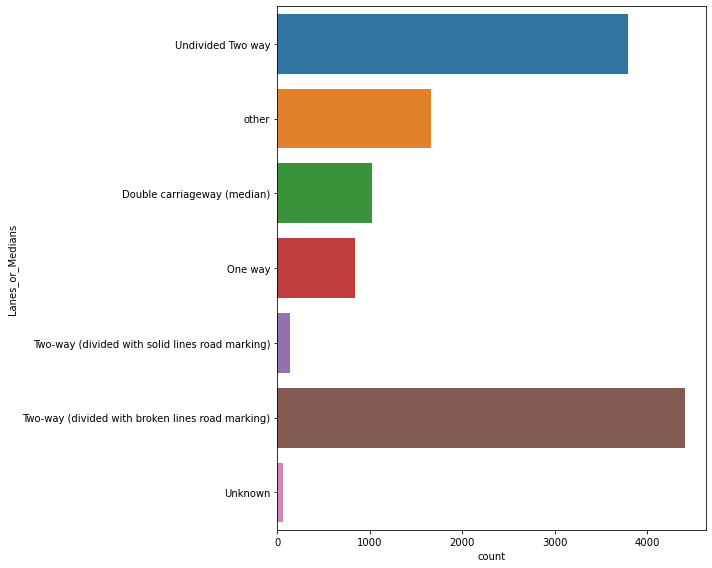

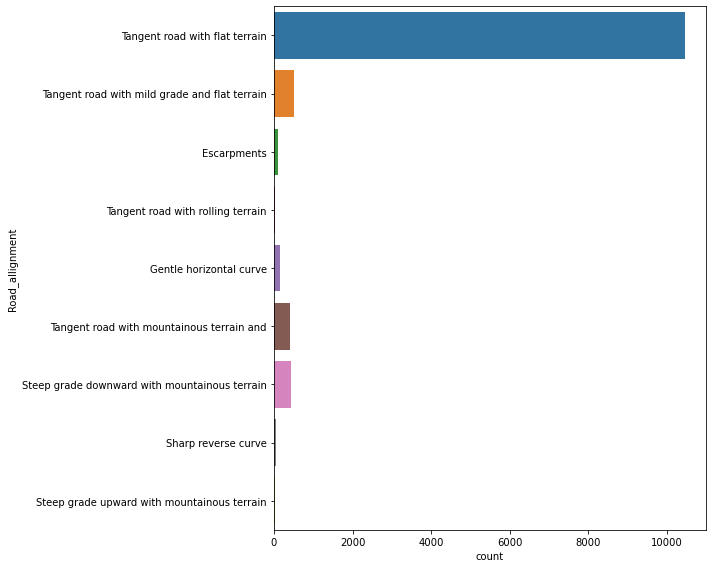

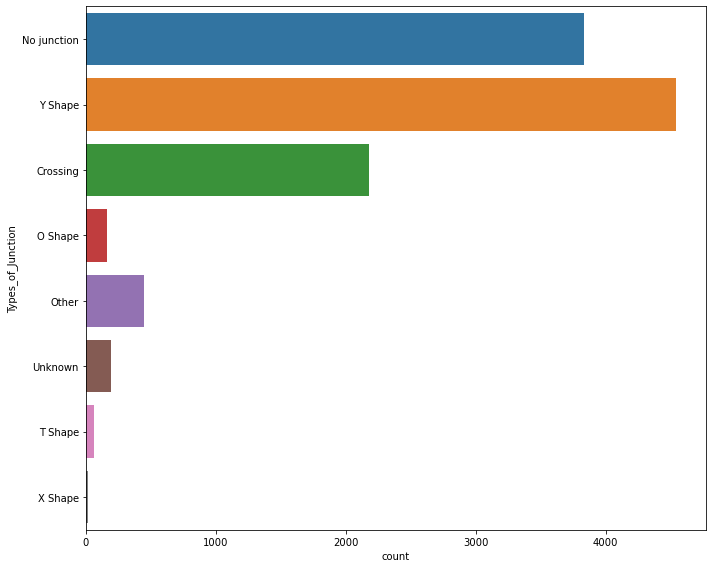

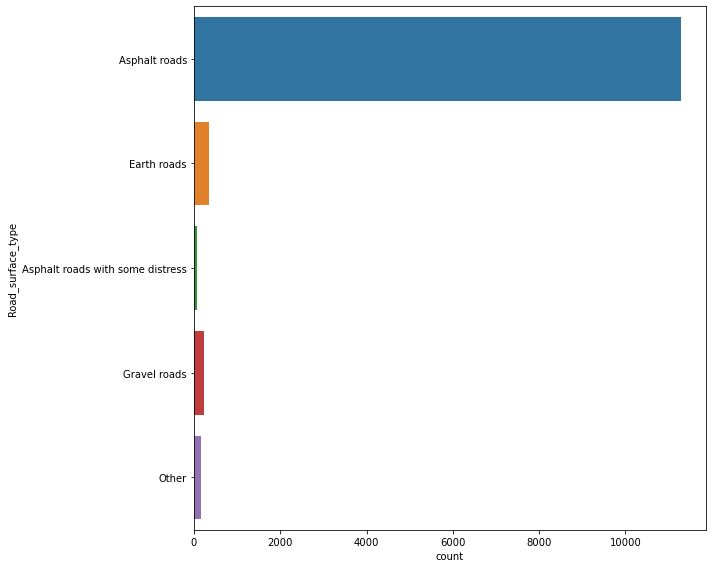

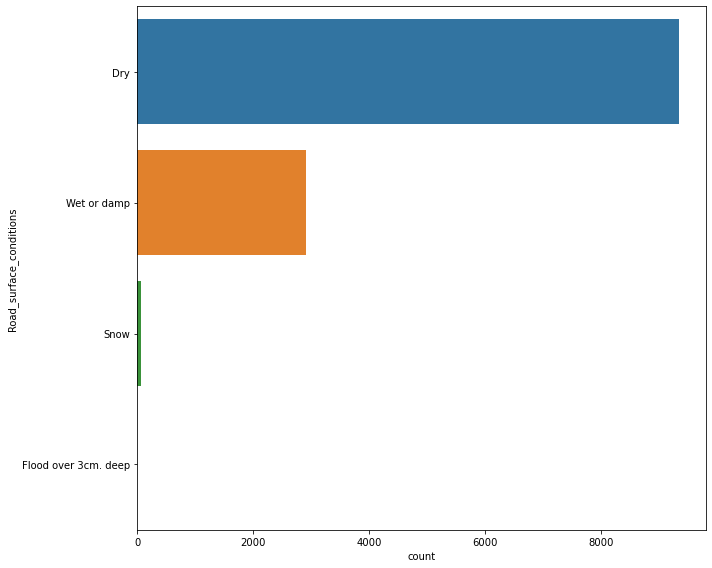

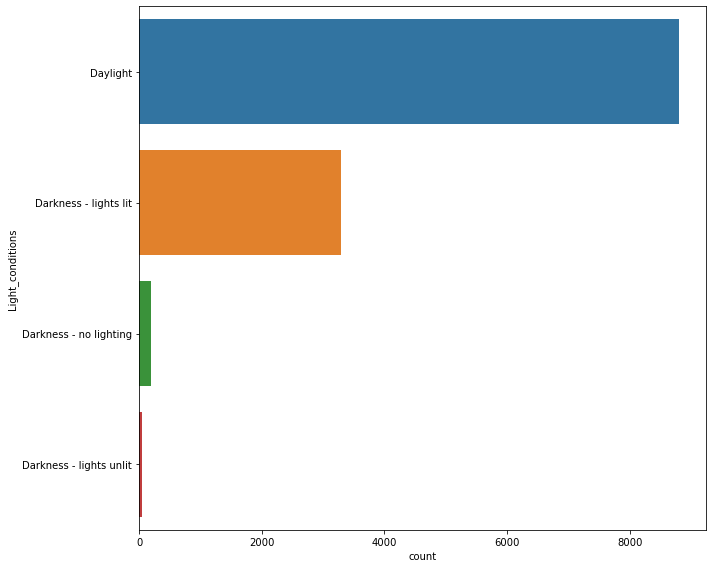

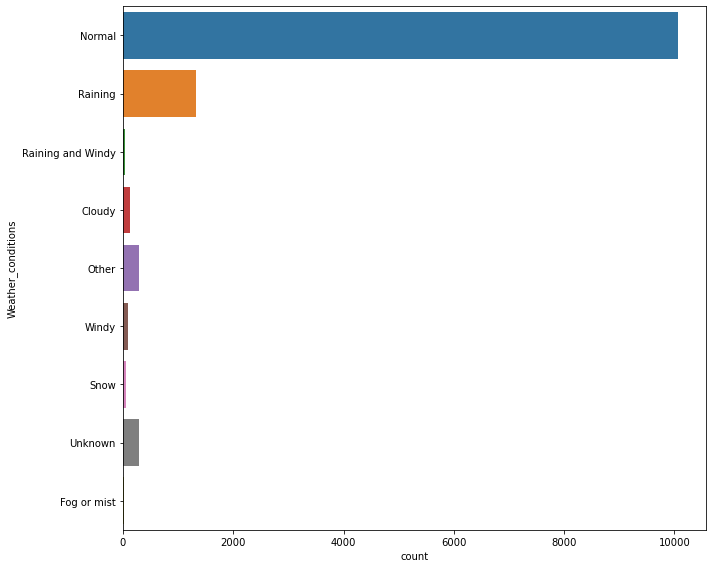

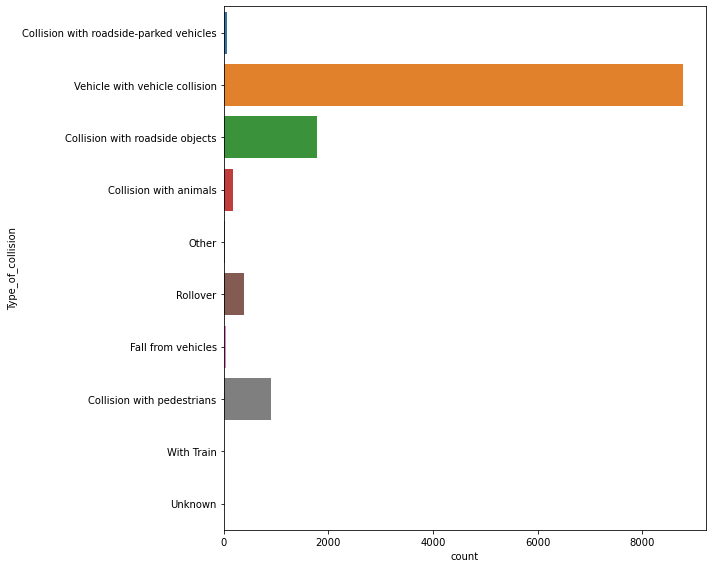

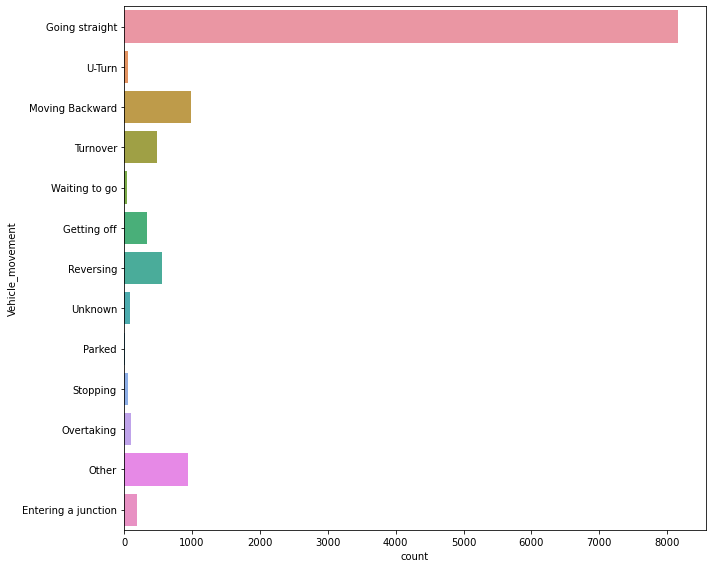

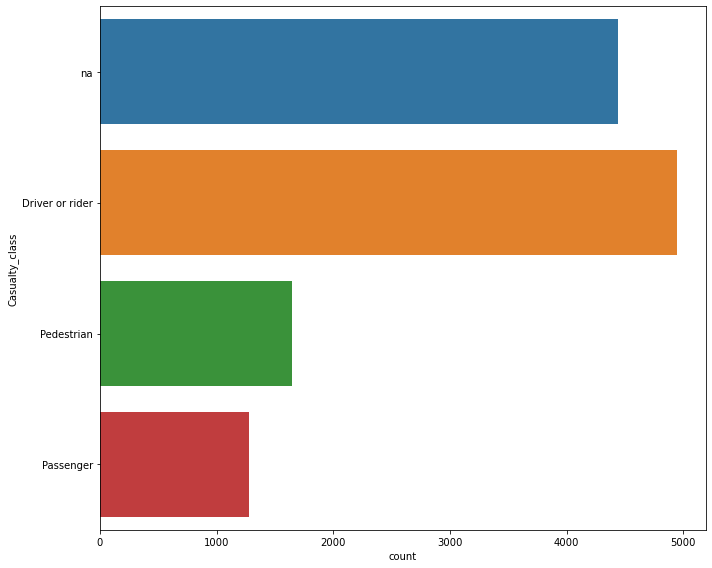

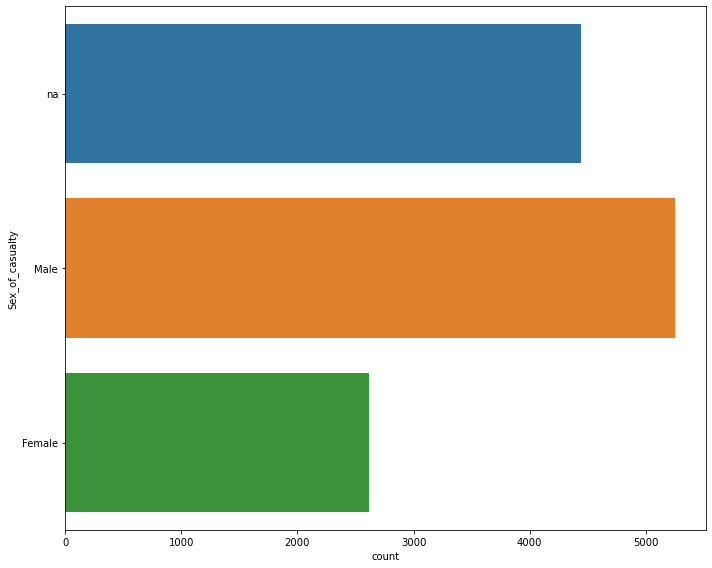

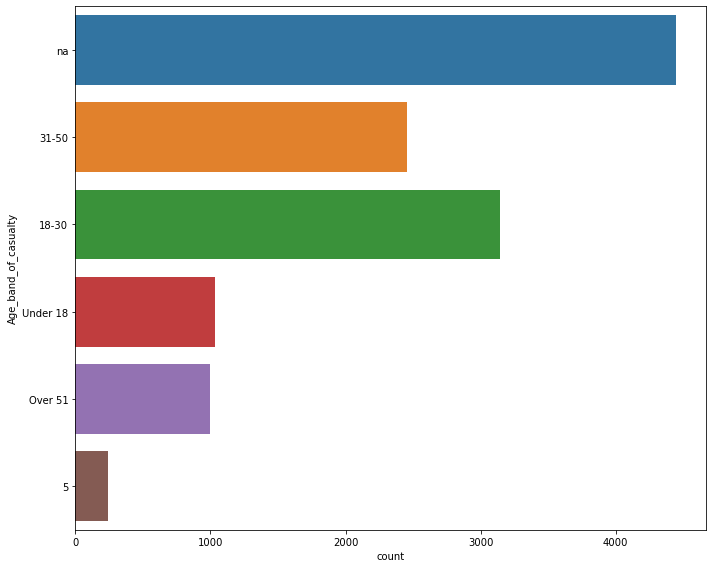

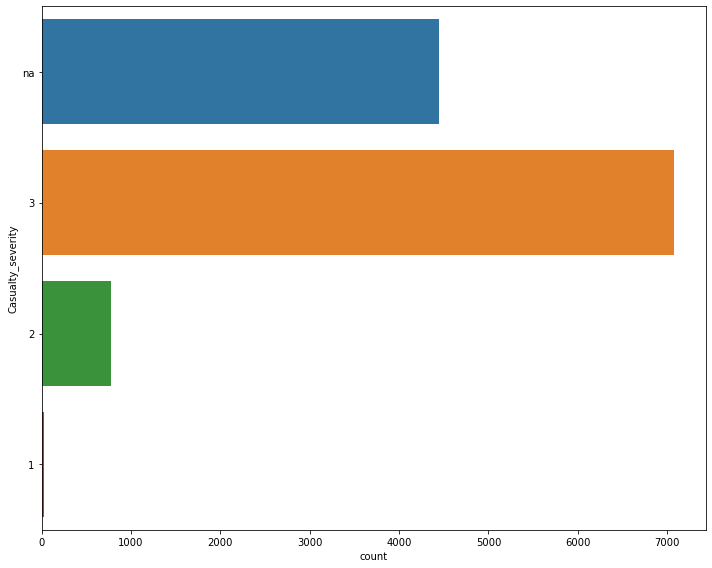

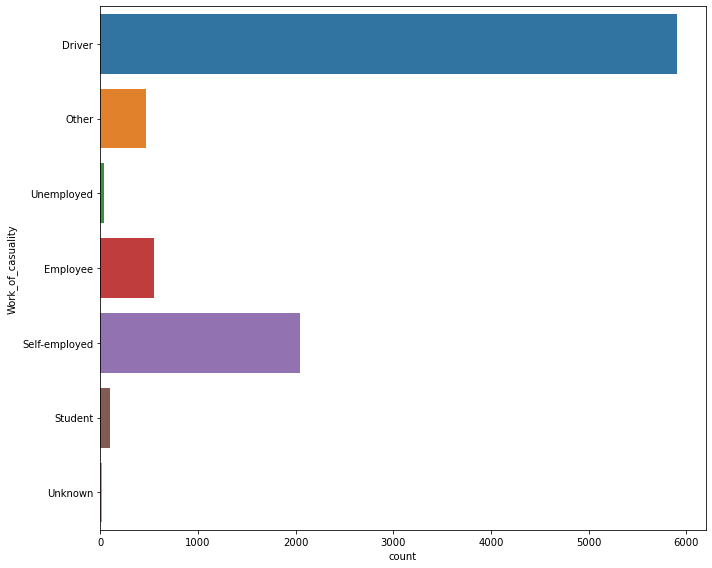

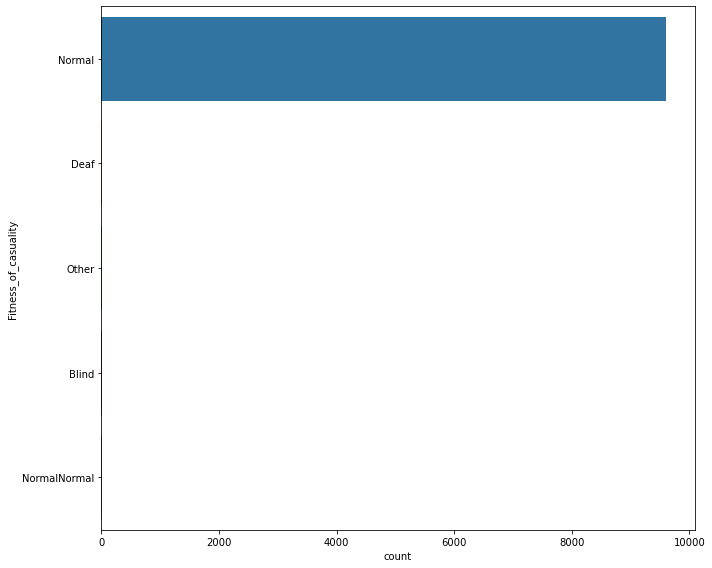

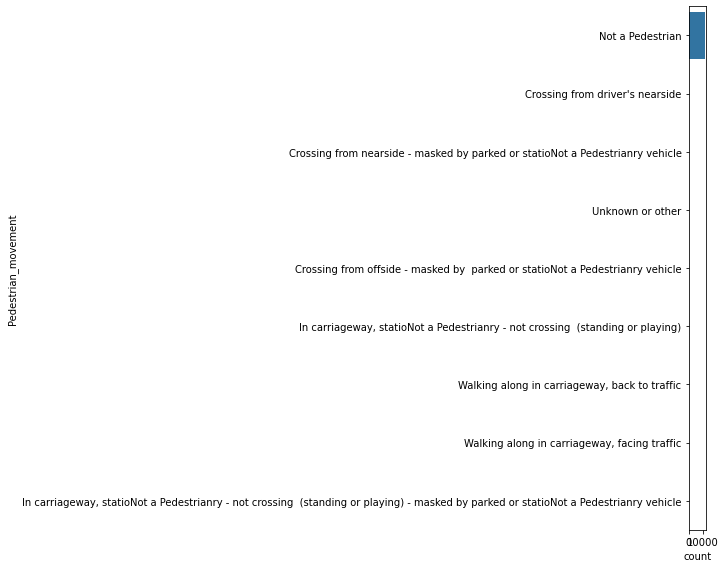

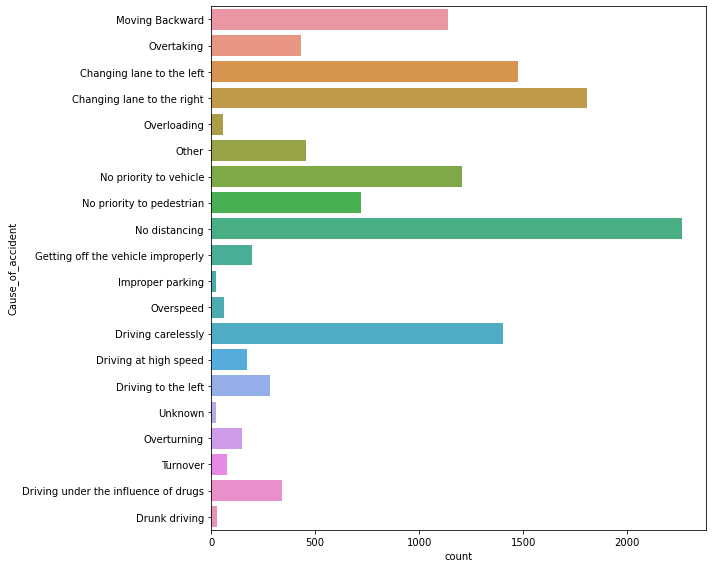

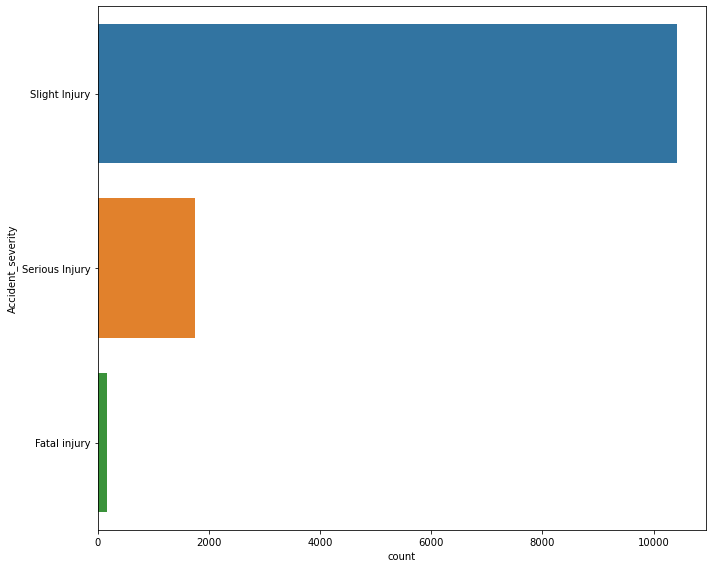

In [19]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.show()

/Insert observations>

**Inspect the Target variable**

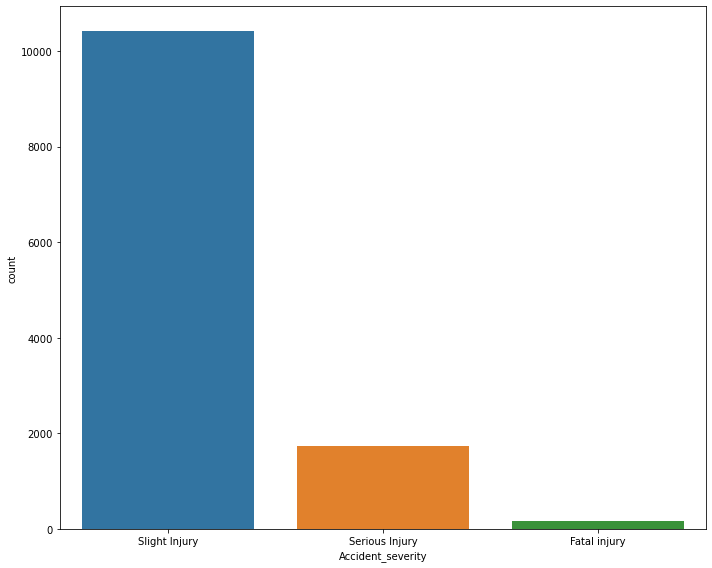

In [20]:
sns.countplot(x=df['Accident_severity'], data=df)
plt.show()

**Segment and group by the target feature**

In [21]:
# What day usually the accident happens?
# Accident severity and day of the week 

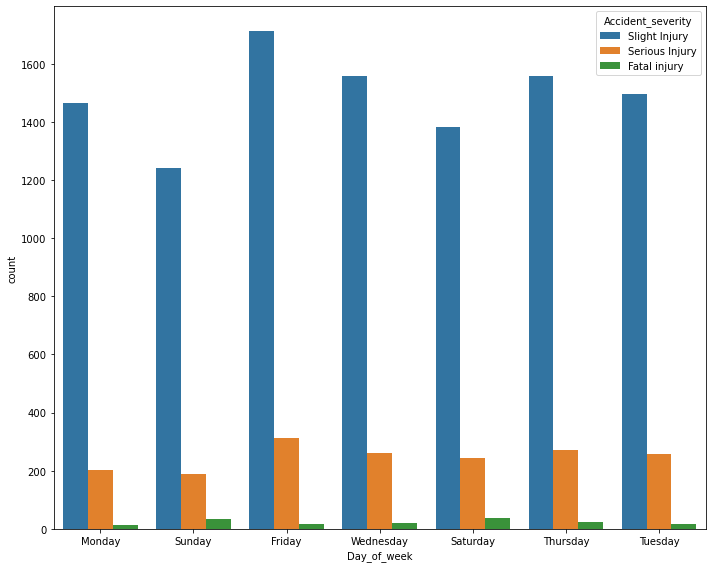

In [22]:
sns.countplot(data=df, x='Day_of_week', hue='Accident_severity')
plt.show()

In [23]:
grouped_data = df.groupby(['Day_of_week', 'Accident_severity']).size()
grouped_data

Day_of_week  Accident_severity
Friday       Fatal injury           16
             Serious Injury        313
             Slight Injury        1712
Monday       Fatal injury           12
             Serious Injury        204
             Slight Injury        1465
Saturday     Fatal injury           37
             Serious Injury        245
             Slight Injury        1384
Sunday       Fatal injury           35
             Serious Injury        190
             Slight Injury        1242
Thursday     Fatal injury           22
             Serious Injury        272
             Slight Injury        1557
Tuesday      Fatal injury           17
             Serious Injury        257
             Slight Injury        1496
Wednesday    Fatal injury           19
             Serious Injury        262
             Slight Injury        1559
dtype: int64

In [24]:
data_to_plot = grouped_data.unstack()
data_to_plot

Accident_severity,Fatal injury,Serious Injury,Slight Injury
Day_of_week,,,
Friday,16,313,1712
Monday,12,204,1465
Saturday,37,245,1384
Sunday,35,190,1242
Thursday,22,272,1557
Tuesday,17,257,1496
Wednesday,19,262,1559


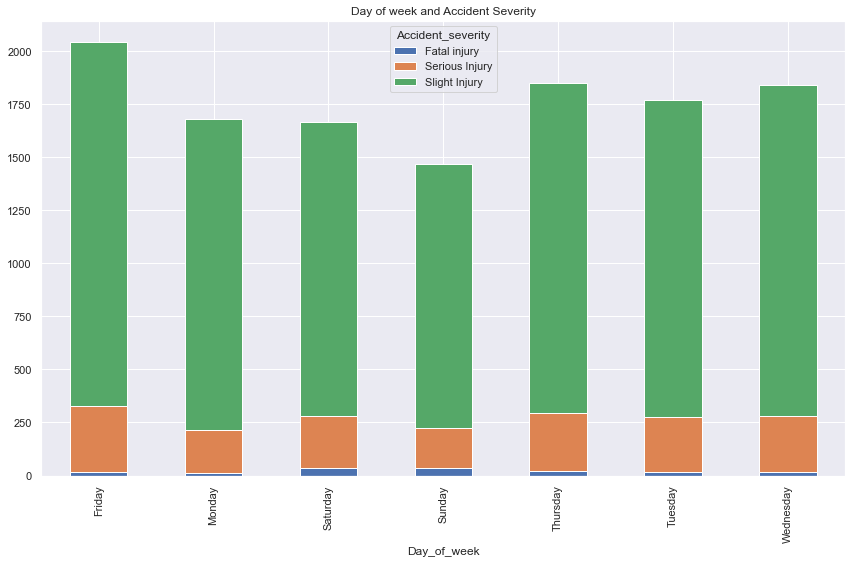

In [25]:
sns.set()
data_to_plot.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Day of week and Accident Severity')
plt.show()

In [26]:
df_new = pd.DataFrame()
df_new['Total_Accident']= df.groupby('Day_of_week')['Accident_severity'].size()
df_new=df_new.sort_values(by='Total_Accident',ascending=False)
df_new

,Total_Accident
Day_of_week,
Friday,2041
Thursday,1851
Wednesday,1840
Tuesday,1770
Monday,1681
Saturday,1666
Sunday,1467


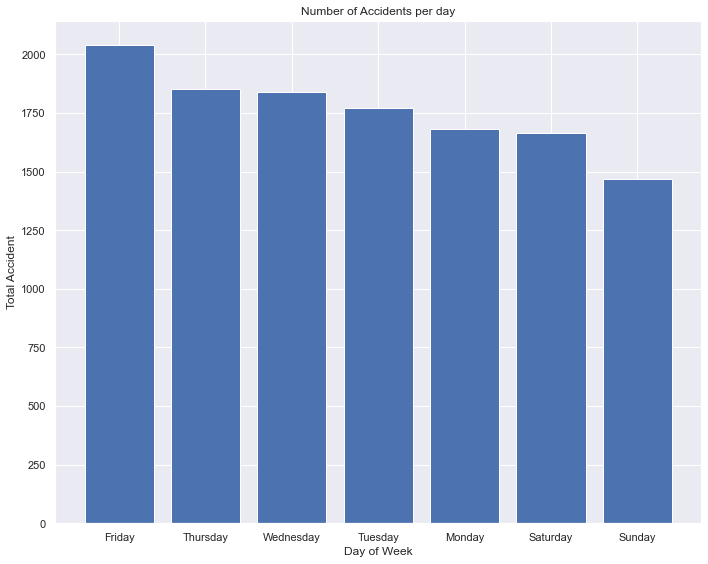

In [27]:
plt.bar(x=df_new.index, height=df_new.Total_Accident)
plt.xlabel('Day of Week')
plt.ylabel('Total Accident')
plt.title('Number of Accidents per day')
plt.show()

In [28]:
# Who are the common casualty class and its accident severity?
# Accident severity and Casualty_class

C:\Users\Rocelle Nathalie Ong\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


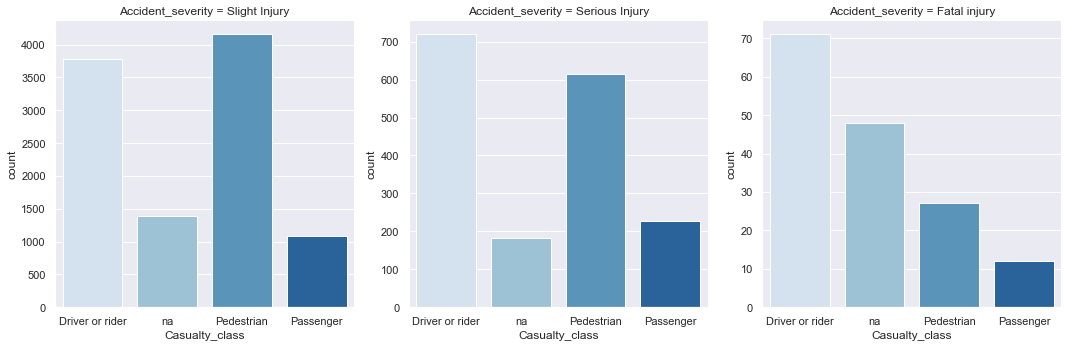

In [29]:
grid = sns.FacetGrid(data=df, col='Accident_severity', height=5, aspect=1, sharey=False)
grid.map(sns.countplot, 'Casualty_class', palette='Blues')
plt.show()

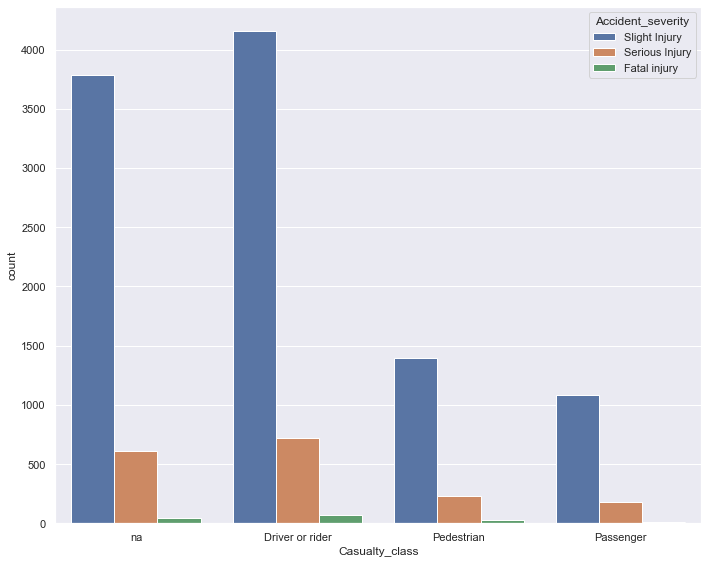

In [30]:
sns.countplot(data=df, x='Casualty_class', hue='Accident_severity')
plt.show()

In [31]:
#What age range of the 
#Age_band_of_driver and Accident Severity

C:\Users\Rocelle Nathalie Ong\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


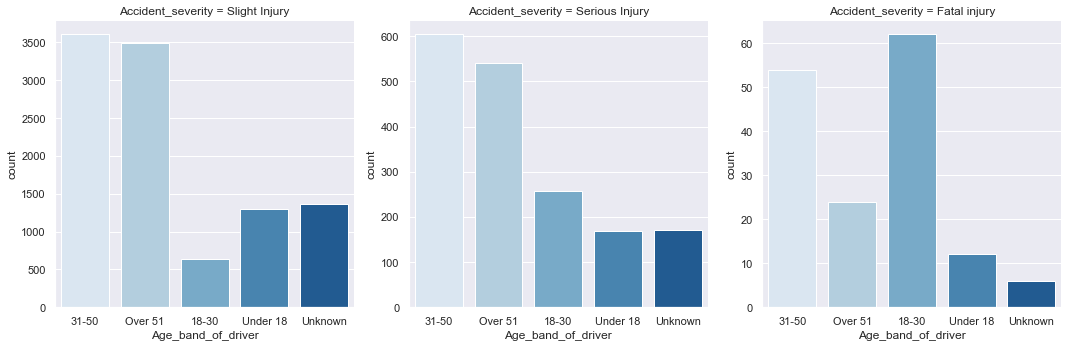

In [32]:
grid = sns.FacetGrid(data=df, col='Accident_severity', height=5, aspect=1, sharey=False)
grid.map(sns.countplot, 'Age_band_of_driver', palette='Blues')
plt.show()

In [33]:
#How many vehicles involved in an accident and its severity
#Number_of_vehicles_involved and Accident_severity

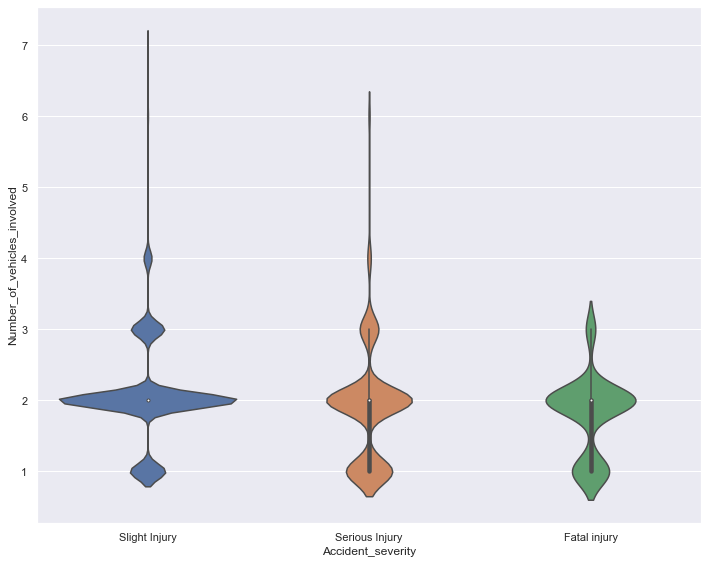

In [34]:
sns.violinplot(data=df, y='Number_of_vehicles_involved', x='Accident_severity')
plt.show()

In [35]:
# When do the accident happens?
# Time vs Accident_severity

In [36]:
df['Day'] = pd.cut(pd.to_datetime(df.Time).dt.hour,
       bins=[0, 6, 12, 18, 24],
       labels=['Dawn', 'morning', 'afternoon', 'evening'],
       right=False,
       include_lowest=True)

df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Day
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,afternoon
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,afternoon
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,afternoon
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,Dawn
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,Dawn


In [37]:
df.drop(columns='Time', inplace = True)
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,afternoon
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,afternoon
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,afternoon
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,Dawn
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,Dawn


C:\Users\Rocelle Nathalie Ong\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


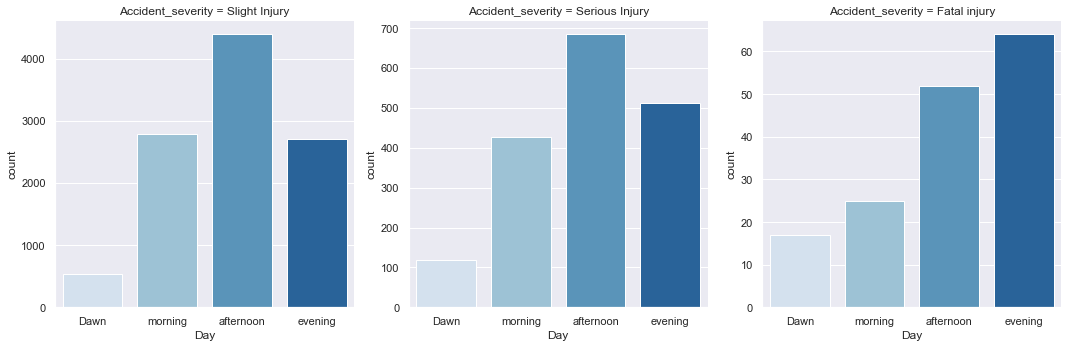

In [38]:
grid = sns.FacetGrid(data=df, col='Accident_severity', height=5, aspect=1, sharey=False)
grid.map(sns.countplot, 'Day', palette='Blues')
plt.show()

In [39]:
df_new = pd.DataFrame()
df_new['Accident_per_day']= df.groupby('Day')['Accident_severity'].size()
df_new=df_new.sort_values(by='Accident_per_day',ascending=False)
df_new

,Accident_per_day
Day,
afternoon,5125
evening,3280
morning,3236
Dawn,675


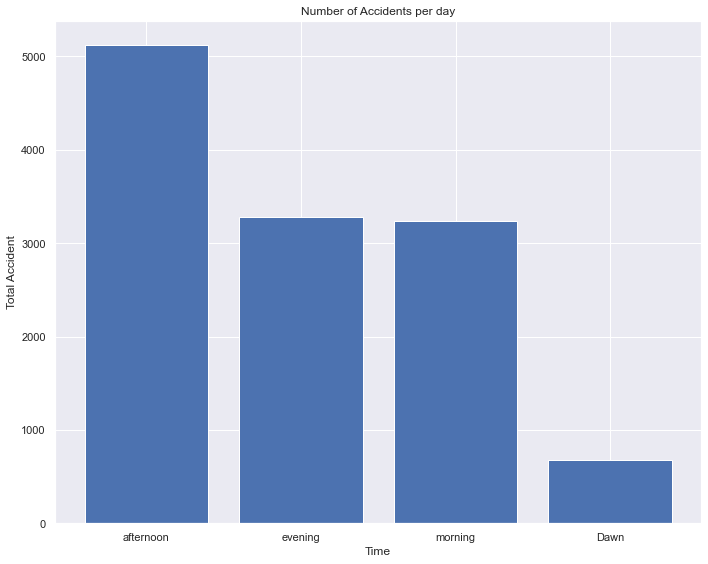

In [40]:
plt.bar(x=df_new.index, height=df_new.Accident_per_day)
plt.xlabel('Time')
plt.ylabel('Total Accident')
plt.title('Number of Accidents per day')
plt.show()

# Data Preprocessing

In [41]:
# Check the unique values of each column
for col in df:
    print(f'{col}: {df[col].unique()}')
    print('--------------------------')

Day_of_week: ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
--------------------------
Age_band_of_driver: ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
--------------------------
Sex_of_driver: ['Male' 'Female' 'Unknown']
--------------------------
Educational_level: ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
--------------------------
Vehicle_driver_relation: ['Employee' 'Unknown' 'Owner' nan 'Other']
--------------------------
Driving_experience: ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
--------------------------
Type_of_vehicle: ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
--------------------------
Owner_of_vehicle: ['Owner' '

**Missing value treatment**

In [42]:
# check for missing values manually
missingval = df.isnull().sum()
percentage_missing = 100 * df.isnull().sum()/len(df)
missing_table = pd.concat([missingval,percentage_missing],axis=1)
missing_table = missing_table.rename(columns = {0:'MissingValues', 1:'Percentage'})
missing_table.sort_values(by='MissingValues',ascending=False)

,MissingValues,Percentage
Defect_of_vehicle,4427,35.945112
Service_year_of_vehicle,3928,31.893472
Work_of_casuality,3198,25.966223
Fitness_of_casuality,2635,21.394933
Type_of_vehicle,950,7.713543
Types_of_Junction,887,7.202014
Driving_experience,829,6.731082
Educational_level,741,6.016564
Vehicle_driver_relation,579,4.701202
Owner_of_vehicle,482,3.913608


In [43]:
missing_table[missing_table['Percentage'] > 20]

,MissingValues,Percentage
Service_year_of_vehicle,3928,31.893472
Defect_of_vehicle,4427,35.945112
Work_of_casuality,3198,25.966223
Fitness_of_casuality,2635,21.394933


The top columns having multiple null values are: Defect_of_vehicle,Service_year_of_vehicle, Work_of_casuality and Fitness_of_casuality. These columns have more than 20% missing values

<AxesSubplot:>

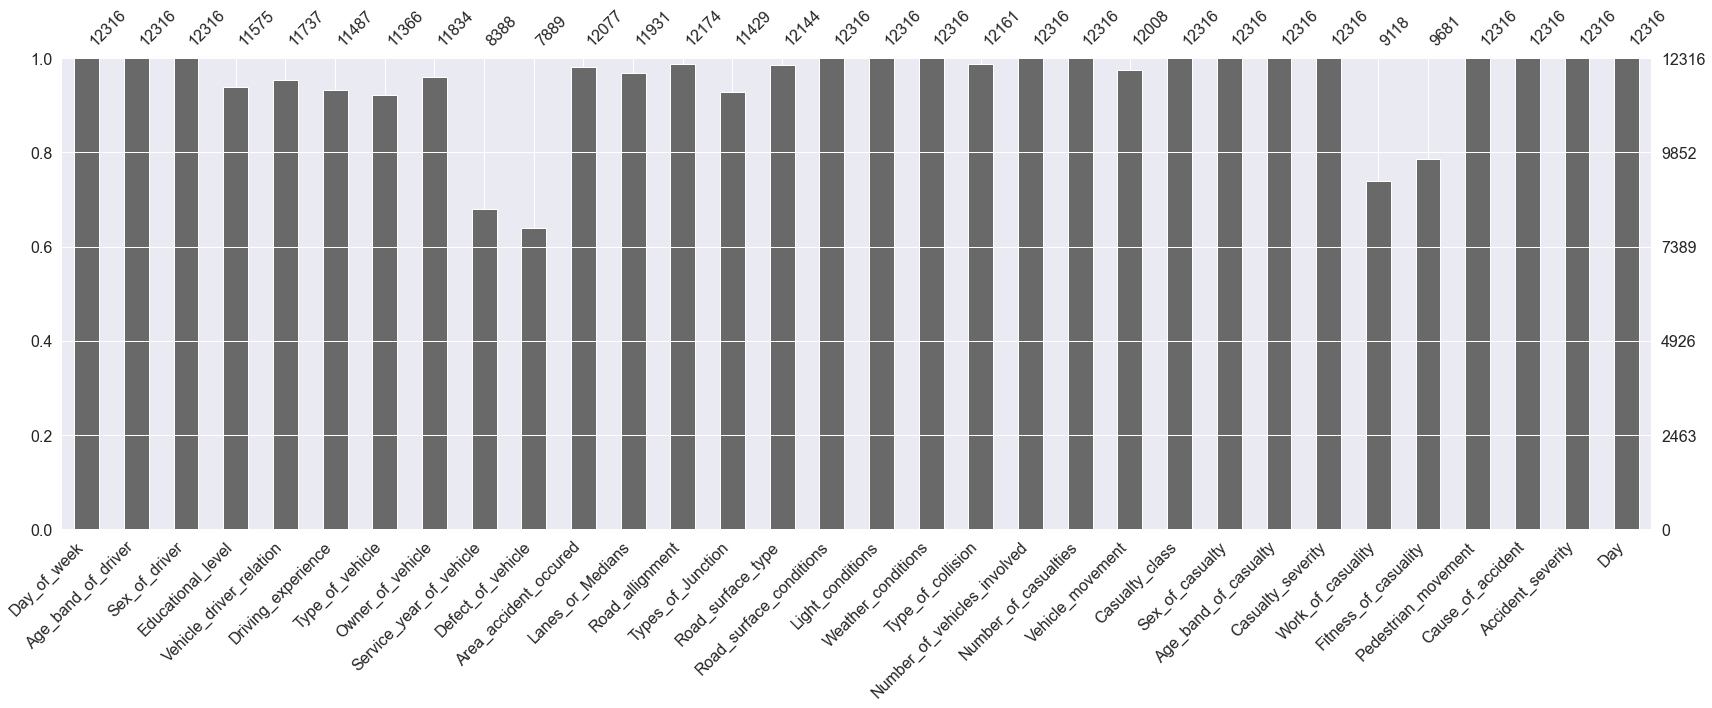

In [44]:
#check for missing values using missingno
msno.bar(df)

Based of the bar chart above, the following columns have a distinct amount missing values: Service_year_of_vehicle, Defect_of_vehicle, Types_of_Junction, Work_of_casualty, Fitness_of_casualty

<AxesSubplot:>

C:\Users\Rocelle Nathalie Ong\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


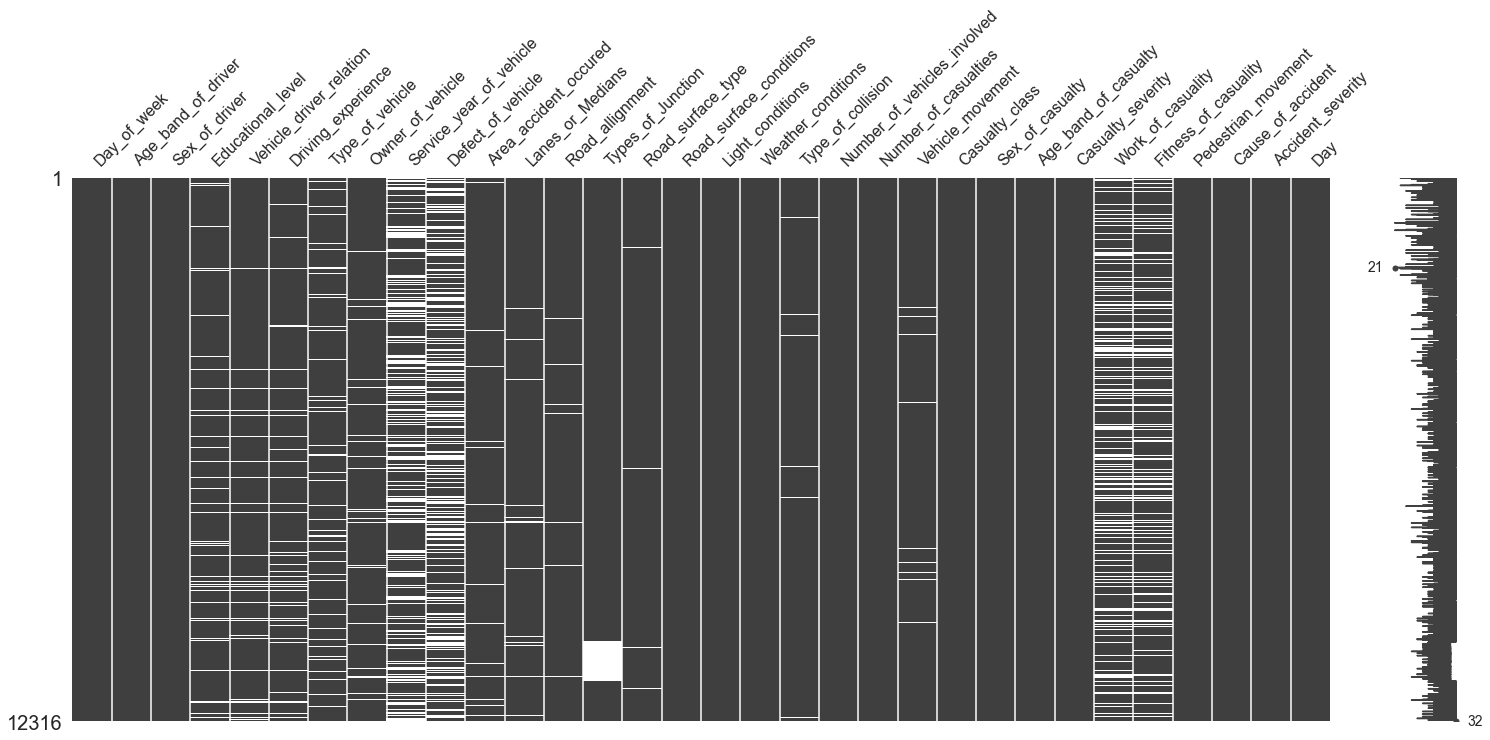

In [45]:
#Visualizing the location of the missing data
msno.matrix(df)

<AxesSubplot:>

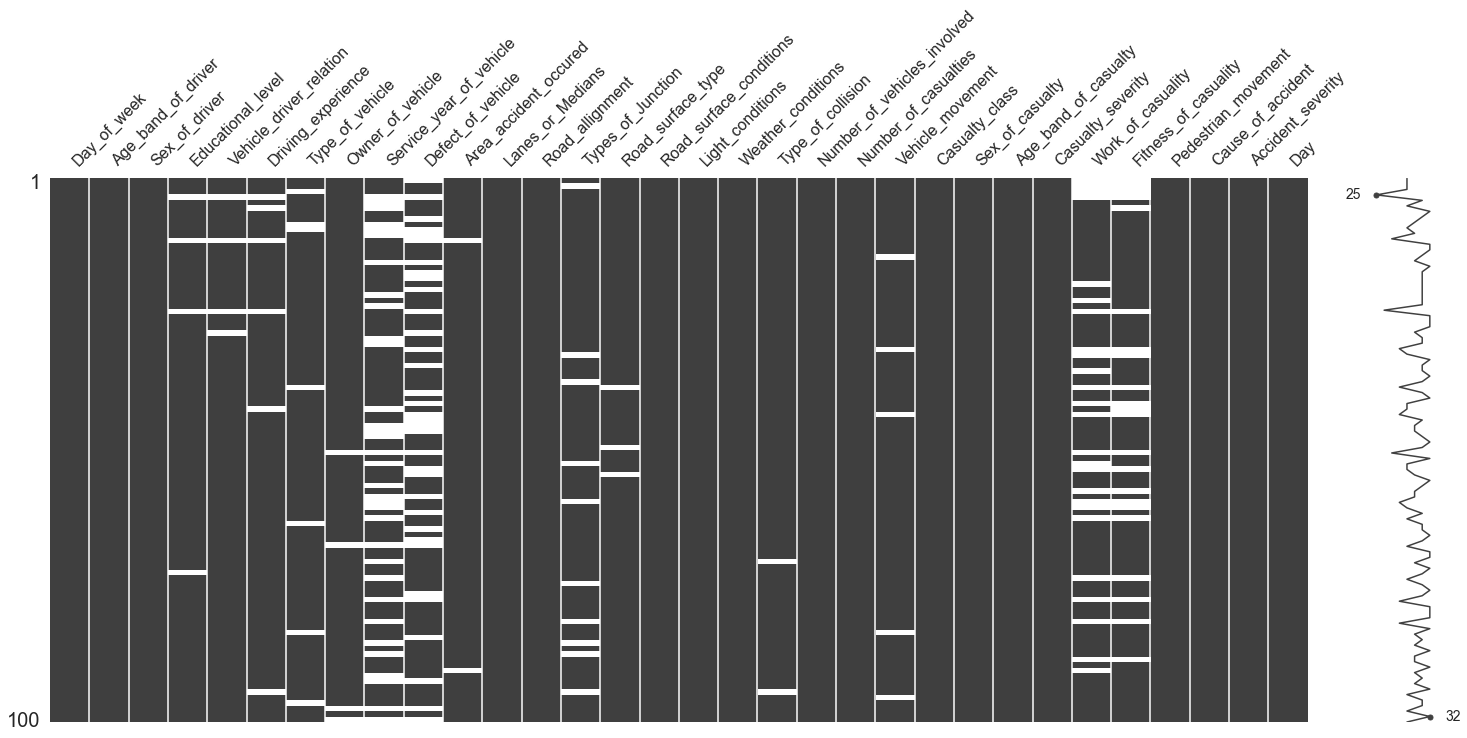

In [46]:
msno.matrix(df.sample(100))

* It can be seen in the graph above that when the work_of_casualty is null, the value of Fitness_of_casualty is also null. Same scenario for Education_level, Vehicle_driver_relation and Driving_experience. These columns might be related with one another.
* By displaying 100 samples, it can be seen that there are multiple null values present for Service_of_year_of_vehicle and Defect_of_vehicle

<AxesSubplot:>

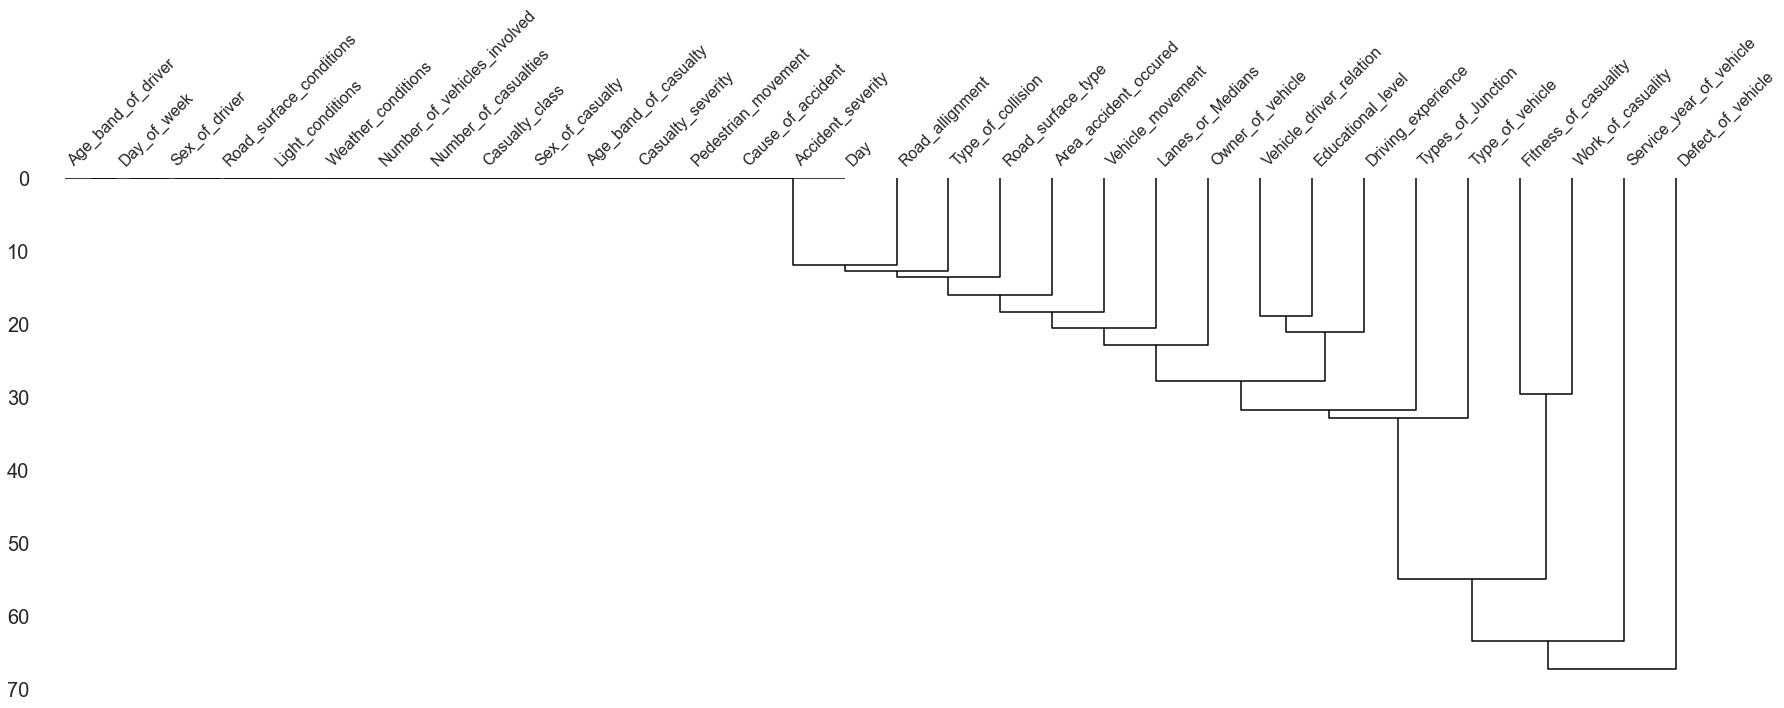

In [47]:
msno.dendrogram(df)

By using dendogram, we can observed the relationship between the columns. It can be seen that Fitness_of_casualty and Work_of_Casualty are highly correlated with one another. So the missing values of these columns can be NMAR

In [48]:
# Convert "na" values to NaN 
df = df.replace('na',np.nan)

for col in df:
    print(f'{col}: {df[col].unique()}')
    print('--------------------------')

Day_of_week: ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
--------------------------
Age_band_of_driver: ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
--------------------------
Sex_of_driver: ['Male' 'Female' 'Unknown']
--------------------------
Educational_level: ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
--------------------------
Vehicle_driver_relation: ['Employee' 'Unknown' 'Owner' nan 'Other']
--------------------------
Driving_experience: ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
--------------------------
Type_of_vehicle: ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
--------------------------
Owner_of_vehicle: ['Owner' '

In [50]:
# Treating missing values 
"""
Since most of the features are categorical, we will be using 
the most frequent values within that particular columns to fill in 
missing values

By this way we can prevent losing important data
"""

from sklearn.impute import SimpleImputer
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = mean_imputer.fit_transform(df)

df.isnull().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_s

**Encoding Categorical to Numerical Values**

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
df_copy = df.copy()

In [72]:
col = df.dtypes.loc[df.dtypes=='object'].index

for i in col:
    df_copy[i+'_enc'] = LabelEncoder().fit_transform(df_copy[i])
    df_copy.drop(columns=i, inplace=True)
df_copy.head()

,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_enc,Age_band_of_driver_enc,Sex_of_driver_enc,Educational_level_enc,Vehicle_driver_relation_enc,Driving_experience_enc,Type_of_vehicle_enc,Owner_of_vehicle_enc,...,Casualty_class_enc,Sex_of_casualty_enc,Age_band_of_casualty_enc,Casualty_severity_enc,Work_of_casuality_enc,Fitness_of_casuality_enc,Pedestrian_movement_enc,Cause_of_accident_enc,Accident_severity_enc,Day_enc
0,2,2,1,0,1,0,0,0,0,3,...,0,1,0,2,0,2,5,9,2,1
1,2,2,1,1,1,4,0,3,11,3,...,0,1,0,2,0,2,5,16,2,1
2,2,2,1,0,1,4,0,0,5,3,...,0,1,1,2,0,2,5,0,1,1
3,2,2,3,0,1,4,0,2,11,0,...,2,0,0,2,0,2,5,1,2,0
4,2,2,3,0,1,4,0,1,0,3,...,0,1,0,2,0,2,5,16,2,0


# Feature Engineering

**Imbalanced Data Treatment**